**Nama : Nuzulurrahmah**

**NPM  : 2108107010012**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Collecting Data
Dataset yang digunakan dalam menyelesaikan tugas 2 ini adalah iris flower dataset

Link: https://www.kaggle.com/datasets/arshid/iris-flower-dataset


In [ ]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocessing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


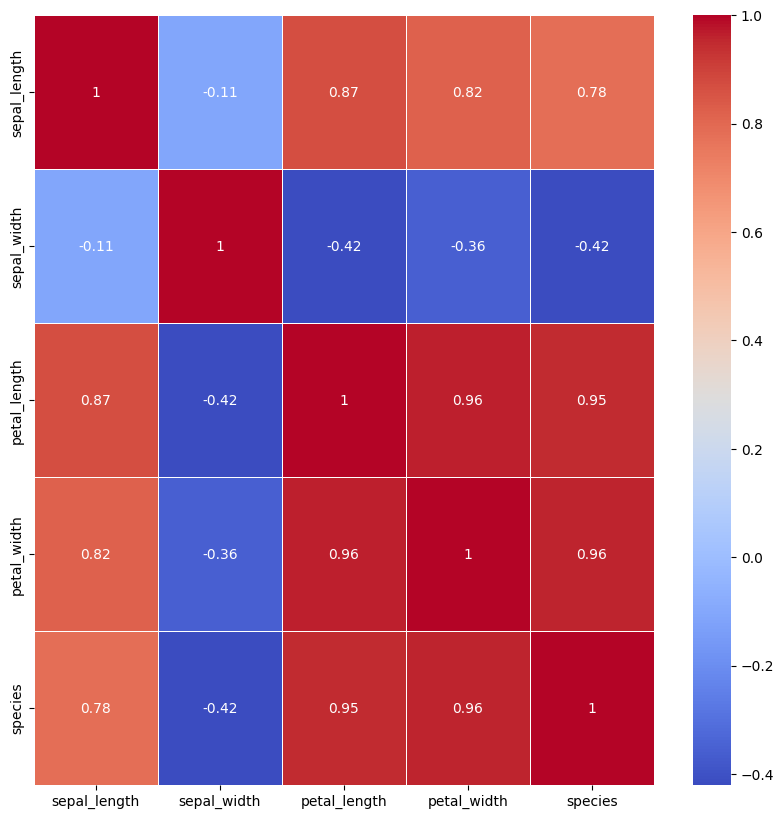

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [ ]:
X = df.iloc[:, [2,3]].values
y = df.species.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Bangun Model

In [ ]:
from sklearn.svm import SVC
kernels = ['linear', 'rbf']

for kernel in kernels:
    classifier = SVC(kernel=kernel)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

## Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix
for kernel in kernels:
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix: \n")
  print(cm)


Confusion Matrix: 

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Confusion Matrix: 

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Akurasi

In [ ]:
from sklearn.metrics import accuracy_score

accuracies = {}

for kernel in kernels:
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[kernel] = accuracy

for kernel, accuracy in accuracies.items():
    print(f"Akurasi {kernel}:", accuracy)

Akurasi linear: 1.0
Akurasi rbf: 1.0


## Visualisasi

<ipython-input-70-3c77752ca889>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


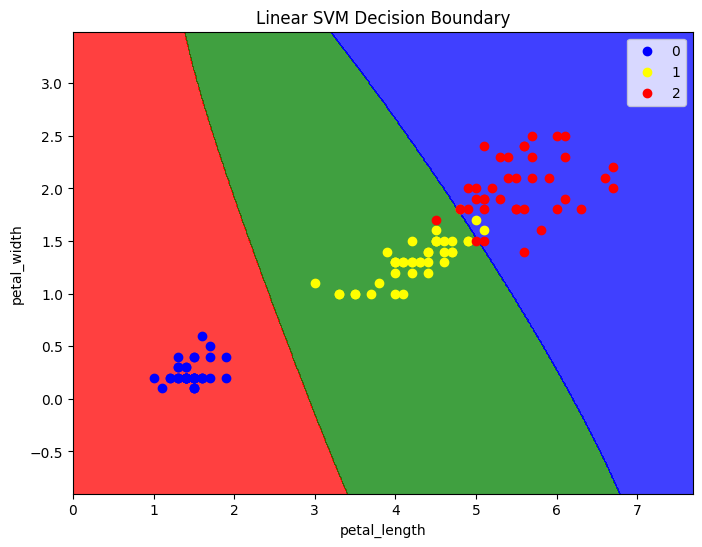

<ipython-input-70-3c77752ca889>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


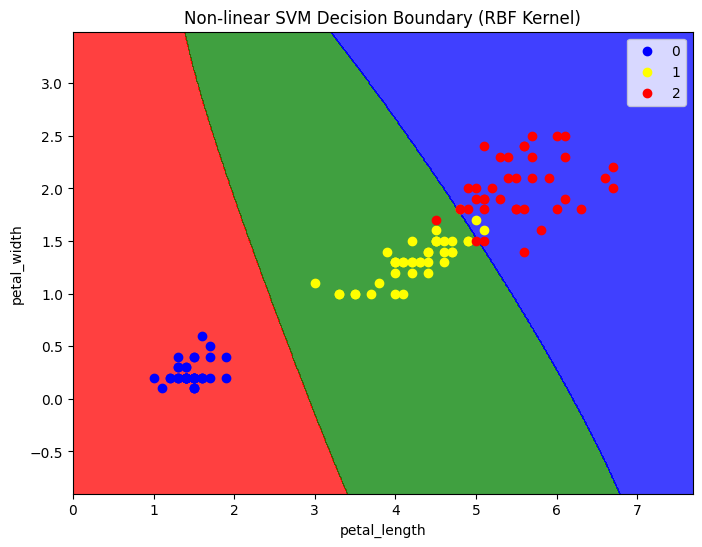

In [ ]:
from matplotlib.colors import ListedColormap

for kernel in kernels:
  plt.figure(figsize=(8, 6))

  if kernel == 'linear':
  # Visualisasi decision boundary untuk kernel linear
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title('Linear SVM Decision Boundary')
  else:
  # Visualisasi decision boundary untuk kernel non-linear (RBF)
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title('Non-linear SVM Decision Boundary (RBF Kernel)')

  # Scatter plot untuk set pelatihan
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
      c = ListedColormap(('blue', 'yellow', 'red'))(i), label = j)

  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend()
  plt.show()

## Menggunakan Model

In [ ]:
classifier.predict([[1.4,0.2]])

array([0])